In [1]:
####################################################
#          Extraction of data from SSPC            #
#       Homicidios Dolosos Fuentes Abiertas        #
#                                                  #
# Author: Mariana Fernandez                        #
# Github: marianafdz465                            #
# email: mariana.fernadez@cide.edu                 #
#                                                  #
# Date: 19/08/2020                                 #
####################################################

In [1]:
#Libraries
import pandas as pd
import camelot
from os.path import isfile, isdir
import os
from pathlib import Path
import glob
import zipfile
from io import StringIO
import logging
from pathlib import Path
from shutil import unpack_archive


In [2]:
# Read pdf's and extract all tables from pdf's saved as .zip

def extract_tables(dirname, destination):
    """ 
    extract_tables 
  
    Extract tables from pdf's 
  
    Parameters: 
    dirname (str)     : Directory where the new data sets will be save
      
    """
    
    for filename in sorted(glob.glob(dirname + '/*.pdf')):
        #print(filename)
        
        try:
          tables = camelot.read_pdf(filename,flavor = "lattice", pages= "all",line_scale=40)
          #camelot.plot(tables[0], kind='grid').show() Just show the structure of the table
          path = Path(filename).stem
          #Saving in root directory
          
          tables.export(destination  + path + ".csv", f="csv", compress=True)
          print("Saved")

        except:
            print("Error, cannot read file")

In [3]:
extract_tables("../data_download/data_source/fuentes_abiertas/", "../data_raw/fuentes_abiertas/2020/october/")

Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved


In [4]:
# Unzip al .zip files 

def unzip_files(dirname):
    """ 
    unzip_files 
  
    Parameters: 
    dirname (str)     : Directory where the new data sets will be save
      
    """
    zip_files = Path(dirname).rglob("*.zip")
    while True:
        try:
            path = next(zip_files)
        except StopIteration:
            break #No more files
        except PermissionError:
            logging.exception("Permission error")
        else:
            extract_dir = path.with_name(path.stem)
            unpack_archive(str(path), str(extract_dir), 'zip')

In [5]:
unzip_files("../data_raw/fuentes_abiertas/2020/september/")

In [6]:
#Remove zip directories

def remove_zips(dirname):
    """ 
    remove_zips 
  
    Parameters: 
    dirname (str)     : Directory where the new data sets will be save
      
    """
    for filename in sorted(glob.glob(dirname + '/*.zip')):
            #print(filename)

            try:
              os.remove(filename)
              print("Removed")

            except:
                print("Error, cannot remove file")
    

In [7]:
remove_zips("../data_raw/fuentes_abiertas/2020/september/")

Removed
Removed
Removed
Removed
Removed
Removed
Removed
Removed
Removed
Removed
Removed
Removed
Removed
Removed
Removed
Removed
Removed
Removed
Removed
Removed
Removed
Removed
Removed
Removed
Removed
Removed
Removed
Removed
Removed
Removed


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


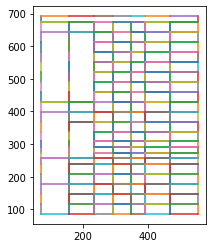

In [4]:
file = "../data_download/data_source/fuentes_abiertas/homicidios_21102020.pdf"
tables = camelot.read_pdf(file,flavor = "lattice", pages= "all",line_scale=40)
camelot.plot(tables[0], kind='grid').show() #Just to show the structure of the table